In [93]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# FaceDetection

- with high-level API (WebcamFaceDetector)

In [7]:
from facelib import WebcamFaceDetector

detector = WebcamFaceDetector()

loading ...
from FaceDetector: weights loaded


In [9]:
# please wait: it shows a window  
detector.run()

type q for exit


- with low-level API(FaceDetector)

In [76]:
import matplotlib.pyplot as plt
from facelib import FaceDetector

img = plt.imread('facelib/imgs/face_rec.jpg')
detector = FaceDetector()

from FaceDetector: weights loaded


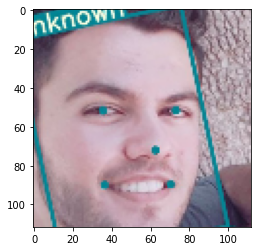

In [77]:
faces, boxes, scores, landmarks = detector.detect_align(img)
plt.imshow(faces.cpu()[0]);

# AgeGenderEstimator

- with high-level API (WebcamAgeGenderEstimator)

In [65]:
from facelib import WebcamAgeGenderEstimator

estimator = WebcamAgeGenderEstimator()

loading ...
from FaceDetector: weights loaded
from AgeGenderEstimator: weights loaded


In [43]:
# please wait: it shows a window  
estimator.run()

type q for exit


- with low-level API(FaceDetector)

In [72]:
import matplotlib.pyplot as plt
from facelib import AgeGenderEstimator, FaceDetector

img = plt.imread('facelib/imgs/face_rec.jpg')
face_detector = FaceDetector()
age_gender_detector = AgeGenderEstimator()

from FaceDetector: weights loaded
from AgeGenderEstimator: weights loaded


In [73]:
faces, boxes, scores, landmarks = face_detector.detect_align(img)
genders, ages = age_gender_detector.detect(faces)
print(genders, ages)

['Male', 'Male'] [12, 11]


# FacialExpression

- with high-level API (WebcamAgeGenderEstimator)

In [70]:
from facelib import WebcamEmotionDetector

detector = WebcamEmotionDetector()

loading ...
from FaceDetector: weights loaded
from EmotionDetector: weights loaded


In [71]:
# please wait: it shows a window
detector.run(camera_index=1)

type q for exit


- with low-level API(FaceDetector)

In [74]:
import matplotlib.pyplot as plt
from facelib import FaceDetector, EmotionDetector

img = plt.imread('facelib/imgs/face_rec.jpg')
face_detector = FaceDetector(face_size=(224, 224))
emotion_detector = EmotionDetector()

from FaceDetector: weights loaded
from EmotionDetector: weights loaded


In [75]:
faces, boxes, scores, landmarks = face_detector.detect_align(img)
list_of_emotions, probab = emotion_detector.detect_emotion(faces)
print(list_of_emotions)

['happy' 'happy']


# FaceRecognition

- with high-level API (WebcamVerify)

In [78]:
from facelib import WebcamVerify

verifier = WebcamVerify()

loading ...
from FaceDetector: weights loaded
from FaceRecognizer: MobileFaceNet Loaded
from FaceRecognizer: facebank updated


In [79]:
# please wait: it shows a window
verifier.run()

type q for exit


- with low-level API(FaceRecognizer)

In [88]:
import matplotlib.pyplot as plt
from facelib import FaceRecognizer, FaceDetector
from facelib import update_facebank, load_facebank, special_draw, get_config

conf = get_config()
detector = FaceDetector()
face_rec = FaceRecognizer(conf)
face_rec.model.eval()

update = True
if update:
    targets, names = update_facebank(conf, face_rec.model, detector)
else:
    targets, names = load_facebank(conf)

from FaceDetector: weights loaded
from FaceRecognizer: MobileFaceNet Loaded
from FaceRecognizer: facebank updated


In [89]:
img = plt.imread('facelib/imgs/face_rec.jpg')

faces, boxes, scores, landmarks = detector.detect_align(img)
results, score = face_rec.infer(conf, faces, targets)
names[results.cpu()]

array(['sajjad', 'Unknown'], dtype='<U7')